# STC Jawwy

In [137]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [138]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [139]:
dataframe = pd.read_csv("stc TV Data Set_T3---.csv", encoding='ISO-8859-1', on_bad_lines='skip',index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [140]:
# check the data shape
dataframe.shape

(1048575, 5)

In [141]:
# display the first 5 rows
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27 00:00:00,Drama
1,7946,Moana,1,2017-05-21 00:00:00,Animation
2,7418,The Mermaid Princess,1,2017-08-10 00:00:00,Animation
3,19307,The Mermaid Princess,2,2017-07-26 00:00:00,Animation
4,15860,Churchill,2,2017-07-07 00:00:00,Biography


In [142]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating
count,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00
std,1.003513e+04,1.119837e+00
min,1.000000e+00,1.000000e+00
25%,8.253000e+03,1.000000e+00
50%,1.714900e+04,2.000000e+00
75%,2.566500e+04,3.000000e+00
max,3.428000e+04,4.000000e+00


In [143]:
# check if any column has null value in the dataset
dataframe.isnull().any()

,0
user_id_maped,False
program_name,False
rating,False
date_,False
program_genre,False


In [144]:
dataframe.isnull().sum()

,0
user_id_maped,0
program_name,0
rating,0
date_,0
program_genre,0


In [145]:
dataframe = dataframe.dropna()

In [146]:
dataframe.isnull().sum()

,0
user_id_maped,0
program_name,0
rating,0
date_,0
program_genre,0


In [147]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [148]:
"""
TODO build your Recommender system to Highlight Programs that usesrs might be interested in
"""
!pip install surprise

In [149]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [150]:
reader = Reader(rating_scale=(1, 5))
Data = Dataset.load_from_df(dataframe[['user_id_maped', 'program_name', 'rating']], reader)

In [151]:
train , test = train_test_split(Data, test_size=0.2)
model = SVD()
model.fit(train)

In [152]:
pre = model.test(test)
print( accuracy.rmse(pre))

RMSE: 0.9118
0.9117845293286213


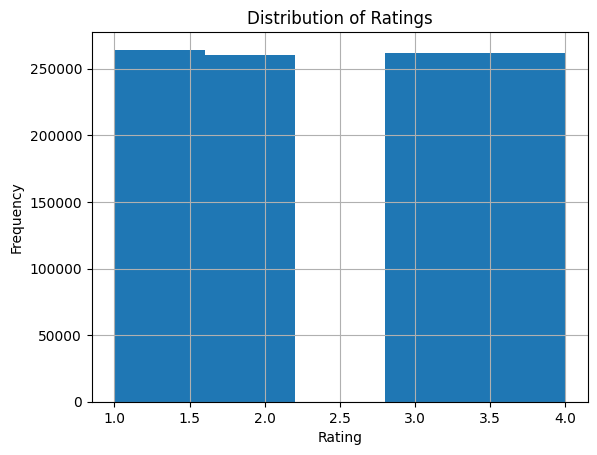

In [153]:
dataframe['rating'].hist(bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [154]:
"""
TODO show the recommendations (top 5) for the people who watched "Moana" movie
"""

'\nTODO show the recommendations (top 5) for the people who watched "Moana" movie\n'

In [155]:
top = []
def recommend_program_5 (program_name):
  for id in dataframe['user_id_maped'].unique():
    pre = model.predict(id, program_name)
    top.append((id, pre.est))
  top.sort(key=lambda x: x[1], reverse=True)
  return top[:5]

In [156]:
recommend_program_5('Moana')

[(28069, 3.731156084101265),
 (5427, 3.561187345266146),
 (9701, 3.528498559751493),
 (30298, 3.43277610184417),
 (27674, 3.3117116916022344)]